# <center>**Machine Learning**</center>
# <center>**COMP8220 - Major Project**</center>

**Dataset Description** - *We are using the very famous (**CelebA**) dataset in this project task. The link to the dataset can be found here [CelebA dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). The CelebFaces Attributes Dataset(**CelebA**) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute notations. This dataset has been preprocessed with a new version that is different from the orginal dataset in a few aspects such as: Images are relatively large data items, so we've been provided with a cut down version of the dataset so that it does not cause any problem's with the colab's memory limits. The image size has been cut down to 48 pixels and the number of images provided are also less in comparison to the number of images that the actual dataset holds. The images labelled with more than one color have also been removed. The entire datset provided has been bifurcated into Training, Validation and Test data. As we understand, that our task is a classification task as we have to correctly classify the labels for each image that we feed to our model within a category/class of `0,1,2,3` denoting hair color `['black', 'blond', 'brown', 'gray']` respectively.*

*All the respective data has been downloaded and already stored on the 
google drive and we are mounting the drive using the below 
code, thus making it ready for use in the colab notebook. All the public test data and the private test data has been loaded.*

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


*Importing all the required libraries that would be used as we will keep progressing over the project task.*

---

In [2]:
import pandas as pd                                                                           #Creating dataframes using list of images
import numpy as np                                                                            #Reading and processing images using Numpy arrays
from os.path import join                                                                      #To combine data files stored at a specific path
import matplotlib.pyplot as plt                                                               #To display plots
from sklearn.neural_network import MLPClassifier                                              #To train and predict using conventional MLPClassifier
from sklearn.metrics import classification_report                                             #For printing the classification report for all the 4 classes
from sklearn.metrics import confusion_matrix                                                  #For displaying the confusion matrix to identify number of correct/incorrect predictions
from sklearn.metrics import accuracy_score                                                    #To calculate how accurate the classification is
from tensorflow.keras import layers, models, optimizers                                       #Importing layers, models and optimizers for building the CNN architecture.
from keras.optimizers import Optimizer                                                        #For using model optimizer while compiling the deep learning model
from keras.models import Sequential                                                           #For Initializing the convulutional neural network
import tensorflow as tf                                                                       #Libarary used for deep learning models
from keras.utils import to_categorical                                                        #For performing one hot encoding and converting categorical variables 
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization                  #Importing all the necessary layers for model architecture
from keras.preprocessing.image import ImageDataGenerator                                      #To be used for data augmentation at a later stage
from keras.callbacks import LearningRateScheduler                                             #To use learning rate over each epoch run

Using TensorFlow backend.


*The below code reads all the data files from the data path and loads the data in colab for further use. Note that we have 4 classes/labels to be predicted for this task (**black,blond,brown,gray**) and the image size has been set cut down to 48.*

---

In [3]:
image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']            ## Labels to be predicted(4 Classes)
dataset_directory = '/content/drive/My Drive/Image_Dataset/'  ## Datapath directory

images_train = np.load(join(dataset_directory, 'train_images.npy'))   ##Loading the training images
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))   ##Loading training labels

images_val = np.load(join(dataset_directory, 'val_images.npy'))       ##Loading validation images
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))       ##Loading validation labels
files_val = np.load(join(dataset_directory, 'val_files.npy'))

images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))     ##Loading public test images
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

files_test_private = np.load(join(dataset_directory, 'test_private_files.npy'))
images_test_private = np.load(join(dataset_directory, 'test_private_images.npy'))     ##Loading private test images

images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0            
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_private = images_test_private.reshape([-1, image_size, image_size, 3]) / 255.0


print("Shape of images_train:", images_train.shape)
print("Shape of images_val:", images_val.shape)
print("Shape of images_test_public:", images_test_public.shape)
print("Shape of images_test_private:", images_test_private.shape)

Shape of images_train: (98479, 48, 48, 3)
Shape of images_val: (12270, 48, 48, 3)
Shape of images_test_public: (11921, 48, 48, 3)
Shape of images_test_private: (13143, 48, 48, 3)


Here is a one liner description to all the data files being used and read:


> **train_images.npy:** *This file contains images from the overall dataset on which the ML models will be trained upon.(**98479** records along with the images input shape which is 48*48*3).*

> **val_images.npy:** *This file contains images from the overall dataset that will be used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.(**12270** records along with the images input shape which is 48*48*3).*

> **test_public_images.npy:** *This file contains images from the overall dataset that will be used to provide an unbiased evaluation of a final model fit on the training dataset.(**11921** records along the images input shape which is 48*48*3).*

The defined npy files are a standard format for files using numpy.

**Note:** *Along with this, we have 4 labels (0-3 classes) correspondong to hair colors (**'black', 'blond', 'brown', 'gray'**) respectively.*

---

*Plotting a sample of just 30 training images just to have an overview of  what the data images actually look like.*

---

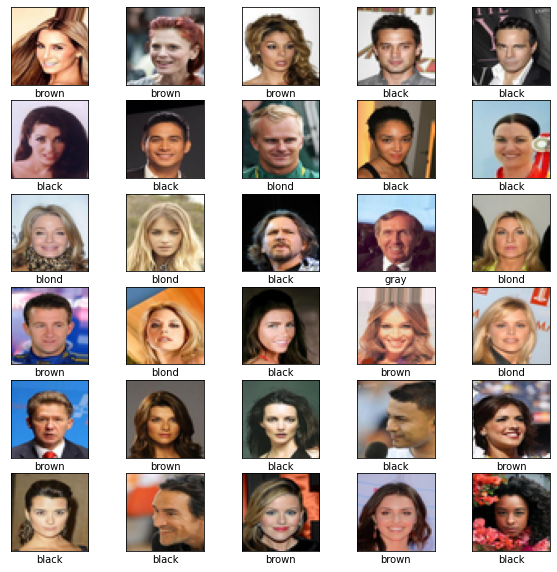

In [0]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    plt.xlabel(hair_colours[labels_train[i]])
plt.show()

*As we can see from the loaded images, that for this training data, below each image there is a label for that image out of a category of 0-3 denoting the hair color for each celebrity.*

---



*Plotting a sample of just 30 images from the private test set just to have an overview of  what the data images actually look like.*


---

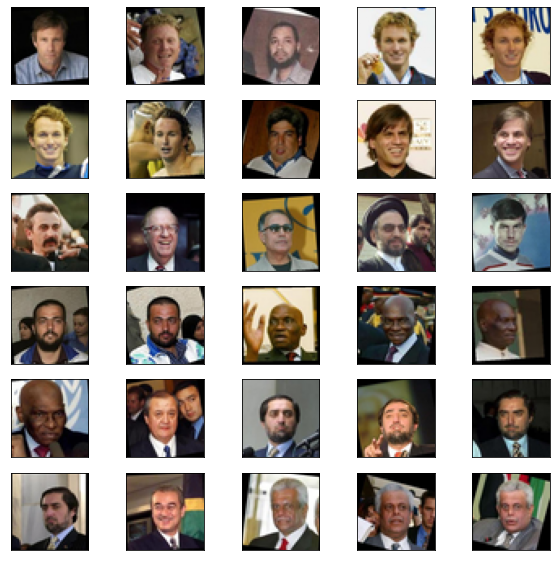

In [0]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_private[i], cmap=plt.cm.binary)
plt.show()

*We can see that there are some images of **bald** men in this sample of 30 images. Now, our task is to predict the hair color of each celebrity in the image into three categories of `['black', 'blond', 'brown', 'gray']`. This may have an impact on how the Deep learning model generalises to this private images dataset at a later stage.*

*Now, as we have looked at the data from both the training set and the private set, let's get started with applying the conventional ML models on this dataset.*

# <center>**Conventional ML model**</center>

*As we know, this this task is a classification task, so we can use a number of machine learning algorithms like `Naive Bayes, Decision trees and Neural network's mlp(Multi layer perceptron`) as these tend to perform well for classification based tasks. After implementation of a few conventional ML algorithms and comparing the accuracy scores for all of those, the best model that we have chosen to classify this task of hair color class prediction is MLPClassifier that is provided by the class sklearn.neural_network in python. The other algorithms that we implemented like `Decision tree` gave an accuracy score of around 68% on the public dataset (`entry listed under kaggle in class competition for public dataset`), but the final model that produced the best-performing predictions for the kaggle submission was MLP with an accuracy score of around 85% which is also available here [Kaggle submission-public data](https://www.kaggle.com/c/celeba-guess-hair/submissions)


*As of now, the input shape for each image is 4 dimensional so we need to reshape it to 2 dimension so that we can feed the images to our training data and we achieve that by using the `.reshape()`function in python to transform the image size to a two dimensional form.*

---

In [0]:
images_train = images_train.reshape(98479, 48*48*3)
images_val = images_val.reshape(12270, 48*48*3)
images_test_public = images_test_public.reshape(11921, 48*48*3)

*Just to check that whether we have successfully reshaped the dimension of our dataset.*

In [0]:
print("Shape of images_train:", images_train.shape)
print("Shape of images_val:", images_val.shape)
print("Shape of images_test_public:", images_test_public.shape)

Shape of images_train: (98479, 6912)
Shape of images_val: (12270, 6912)
Shape of images_test_public: (11921, 6912)


# **Neural Network(Multi layer perceptron)**

*A multi layer perceptron is a class of feedforward artifical neural network. The minimum requirement for an MLP is to have at least three layers, namely: an input layer, a hidden layer and an output layer.*

*The below code is for initializing the model and fitting to the training data.*

In [0]:
mlp = MLPClassifier(max_iter=50)
mlp.fit(images_train, labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

*The below code prints the accuracy for our classifier/model on the validation dataset.*

In [0]:
score_mlp = mlp.score(images_val, labels_val)
print("Accuracy for MLP:", score_mlp)

Accuracy for MLP: 0.8464547677261614


*As we can interpret from the output, that our model generalised well on the validation data and gave an accuracy of around 85%. That means for our conventional approach, we only have 15% instances where our model made wrong predictions in classifying the hair color which is not bad considering the fact that we have only limited images to validate the model on.*

*We can have a more closer look to what actually happened with the wrong predictions by checking the classification report or confusion matrix and identifying that how our model predicted incorrectly for a particular class.*


*The below code displays few of a labels predicted by our MLPClassifier on the validation images data.*

In [0]:
y_pred = mlp.predict(images_val)
print("Labels predicted by our model:", y_pred)

Labels predicted by our model: [0 2 2 ... 2 0 0]


*We are printing the `classification_report` to show the comparison of actual prediction vs the prediction done by our model on validation dataset.*

In [0]:
predicted_classes = y_pred
actual_classes = labels_val
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(actual_classes, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.93      0.87      4007
     Class 1       0.90      0.85      0.88      2852
     Class 2       0.86      0.77      0.81      4507
     Class 3       0.78      0.84      0.81       904

    accuracy                           0.85     12270
   macro avg       0.84      0.85      0.84     12270
weighted avg       0.85      0.85      0.85     12270



*We are printing the `confusion_matrix` to show the comparison of actual prediction vs the prediction done by our model on validation dataset.*

We can interpret the below from the confusion matrix:

*   Class 0(**black**) - Our model made 3740 correct prediction out of a total of 4007 and classified it into Class 0, however the model made wrong prediction and classified 12 into class 1, 218 into class 2 and 37 into class 3 instead of predicting all these as class 1.

Similarly, for other classes, the model did made some wrong predictions. Based on the classification report, we can see that the f1-score is the best for class 1 among all other 4 classes. We can conclude that, considering that we only had a small chunk of validation data, our MLPClassifier overall,generalised well.



In [0]:
predicted_classes = y_pred
actual_classes = labels_val
target_names = ["Class {}".format(i) for i in range(4)]
print(confusion_matrix(actual_classes, predicted_classes))

[[3740   12  218   37]
 [  29 2430  299   94]
 [ 772  194 3461   80]
 [  51   52   46  755]]


# <center>**Deep Learning Model**</center>

*Deep learning is a subset of machine learning algorithms. The choice of using deep learning for this image classification task is that, it is very good at recognizing patterns but typically required large amounts of data. Deep learning excels in recognizing objects in images as it’s implemented using 3 or more layers of artificial neural networks where each layer is responsible for extracting one or more feature of the image.*

*We need to perform the `one-hot encoding` so that it is in readable format for our ML model so as to make a better prediction. One hot encoding is a vector representation where all the elements of the vector are 0 except one element (our ouput class in this case), which has 1 as its value.*

In [0]:
labels_train = to_categorical(labels_train)
labels_val = to_categorical(labels_val)

*Now, we need to reshape the data again from two dimensional to 4 dimensions, as the CNN model does not accept 2 dimension inputs.*

In [0]:
images_train = images_train.reshape(98479,48,48,3)
images_val = images_val.reshape(12270,48,48,3)
images_test_public = images_test_public.reshape(11921,48,48,3)

*Printing the shape of the dataset again, just to ensure that we are feeding the data to the CNN in correct dimensions.*

In [0]:
print("Shape of images_train:", images_train.shape)
print("Shape of images_val:", images_val.shape)
print("Shape of images_test_public:", images_test_public.shape)

Shape of images_train: (98479, 48, 48, 3)
Shape of images_val: (12270, 48, 48, 3)
Shape of images_test_public: (11921, 48, 48, 3)


*Performing data augmentation on the given dataset. Here, we are using the very general and most commonly used parameters for performing data augmentation.*

In [0]:
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        shear_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=False,
        vertical_flip=False)

*In neural networks, the CNN's(Convolutional Neural networks) are one of the most commonly used to perform image recognition tasks, image classification tasks and some other practical problems or applications. In our case, the CNN image classification takes an input image, processes it and then classifies it into certain categories of hair colors(0-3). The input image shape here (48 * 48 * 3) refers to the array of RGB matrix form. To train and test deep learning CNN's, each input image will pass the CNN through a series of convolutional layers with filters(Also known as kernels), MaxPooling layers, Fully connected layers and then at the end we apply softmax function to classify an image with probabilistic values as between 0 to 3.*

> **Conv2D** - This layer is used to extract features from an input image and it accepts two inputs, such as image matrix and a filter or kernel.  Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters.

> **Strides** - Strides is the number of pixels shifts over the input matrix. In our case, the stride is 2. That means, we move the filters to 2 pixels at a time.

> **Activation function** - ReLU stands for Rectified Linear Unit. ReLU’s purpose is to introduce non-linearity in our ConvNet. We have used ReLU as it performs better over the other functions like `sigmoid and tanh`.

> **Batch Normalization** -  The main purpose of using Batch normalization is that it allows each layer of a network to learn by itself a little bit more independently of other layers. It also helps in reducing overfitting. We have used batch normalization along with less dropout which can be a good thing in a sense that we may not lose a lot of information.

> **dropout layer** -  The main purpose of the dropout layer is to prevent the model from overfitting and hence the drop out layer with different parameter values has been added in the model.

> **flatten layer** - In between the MaxPooling and dense layer, we have the flatten layer which serves as a connection source betwewn the Conv2D and the dense layer.

> **dense layer** - The dense layer acts as the output layer for the CNN. Now, we have 4 classes to classify the hair color and hence, we have provided the number of classes which is 4 for our task followed by the `softmax `activation function.










### *Setting up the CNN model*

In [0]:
DL_model = Sequential()

DL_model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (image_size, image_size, 3)))
DL_model.add(BatchNormalization())
DL_model.add(Conv2D(32, kernel_size = 3, activation='relu'))
DL_model.add(BatchNormalization())
DL_model.add(Conv2D(32, kernel_size = 5, strides=2, padding='valid', activation='relu'))
DL_model.add(BatchNormalization())
DL_model.add(Dropout(0.25))

DL_model.add(Conv2D(64, kernel_size = 3, activation='relu'))
DL_model.add(BatchNormalization())
DL_model.add(Conv2D(64, kernel_size = 3, activation='relu'))
DL_model.add(BatchNormalization())
DL_model.add(Conv2D(64, kernel_size = 5, strides=2, padding='valid', activation='relu'))
DL_model.add(BatchNormalization())
DL_model.add(Dropout(0.5))

DL_model.add(Conv2D(128, kernel_size = 4, activation='relu'))
DL_model.add(BatchNormalization())
DL_model.add(Flatten())
DL_model.add(Dense(4, activation='softmax'))

*We are displaying the summary our Deep learning model that provides us 
with all the layers that we have added in our model architecture, ouput shape from all the layers and the number of parameters or weights assigned to each layer.*

In [8]:
DL_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 32)       

*As the model has been initialized, we can define the other parameters required to fit the model on training data and evaluating on the validation data.*



> **optimizer** - The optimizer controls the learning rate. We are using `Adam` as it is the most preferred optimizer over the others.

> **loss** - Mostly, we use `categorical_crossentropy`, but as we have applied `one-hot encoding in our dataset, this should be the preferred optimizer.



In [0]:
DL_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

*We are setting up the learning rate in such a way that it decreases per epoch run. In general, it is a good practise. We have called the `callback` function from the keras library to get a view of internal state and model statistics during training time.*

*We know that there is no rule of thumb in ML model parameter selection. It solely depends upon the type of data that we are dealing with. Below is short a description of the parameters being used:

> **Number of epochs** - Number of passes/iterations to train the whole dataset. In this case, this would be 45 iterations(Random choice)

> **steps_per_epoch** - It uses all of the data and one batch size worth at a time. It is calculated as length of train data // batch_size (98479/64 in our case)

> **Verbose** - 0 for silencing the output and 1 for vice versa.






In [0]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

history = DL_model.fit_generator(datagen.flow(images_train, labels_train, batch_size=64),
                           steps_per_epoch = images_train.shape[0]//64,
                           epochs=45,
                           verbose=1,
                           validation_data=(images_val,labels_val),
                           callbacks=[annealer])

Epoch 1/45
1538/1538 [==============================] - 110s 71ms/step - loss: 0.6771 - accuracy: 0.7525 - val_loss: 0.5331 - val_accuracy: 0.8134
Epoch 2/45
1538/1538 [==============================] - 104s 68ms/step - loss: 0.4215 - accuracy: 0.8458 - val_loss: 0.3839 - val_accuracy: 0.8652
Epoch 3/45
1538/1538 [==============================] - 104s 68ms/step - loss: 0.3593 - accuracy: 0.8694 - val_loss: 0.2815 - val_accuracy: 0.9001
Epoch 4/45
1538/1538 [==============================] - 103s 67ms/step - loss: 0.3336 - accuracy: 0.8785 - val_loss: 0.3819 - val_accuracy: 0.8593
Epoch 5/45
1538/1538 [==============================] - 104s 67ms/step - loss: 0.3110 - accuracy: 0.8862 - val_loss: 0.3841 - val_accuracy: 0.8597
Epoch 6/45
1538/1538 [==============================] - 103s 67ms/step - loss: 0.2978 - accuracy: 0.8900 - val_loss: 0.2746 - val_accuracy: 0.8949
Epoch 7/45
1538/1538 [==============================] - 103s 67ms/step - loss: 0.2813 - accuracy: 0.8975 - val_loss: 0

*Printing out the Validation loss and Validation accuracy for our Deep learning model.*

In [0]:
val_loss, val_acc = DL_model.evaluate(images_val, labels_val)
print("Validation accuracy of the model:", val_acc)
print("Validation loss of the model:", val_loss)

12270/12270 [==============================] - 4s 357us/step
Validation accuracy of the model: 0.9245314002037048
Validation loss of the model: 0.21251659954381164


*Displaying the confusion matrix and classification_report so that we can discuss and analyse the results in a bit more detail.*



In [0]:
predicted_labels_DL = np.argmax(y_pred_DL, axis=1)
actual_labels_DL = np.argmax(labels_val, axis=1)
target_names = ["Class {}".format(i) for i in range(4)]
print("Classification report from our deep learning model:\n", classification_report(actual_labels_DL, predicted_labels_DL, target_names=target_names, zero_division=True))
print("Confusion matrix from our deep learning model:\n", confusion_matrix(actual_labels_DL, predicted_labels_DL))

Classification report from our deep learning model:
               precision    recall  f1-score   support

     Class 0       0.92      0.96      0.94      4007
     Class 1       0.92      0.95      0.94      2852
     Class 2       0.93      0.88      0.91      4507
     Class 3       0.92      0.91      0.92       904

    accuracy                           0.92     12270
   macro avg       0.92      0.92      0.92     12270
weighted avg       0.92      0.92      0.92     12270

Confusion matrix from our deep learning model:
 [[3828    6  154   19]
 [   2 2718  111   21]
 [ 324  178 3978   27]
 [   9   45   30  820]]


### *Analysis and discussion of results from the confusion matrix.*

*As we can interpret from the confusion matrix, our deep learning model did a good job of correctly predicting labels for all the 4 classes with an overall fine precision.*

> **Class 0 (black)** - Our model correctly predicted 3828 images into class 0 category out of a total of 4007 with an accuracy of over 95%, however it did some wrong predictions and classified 6 images into class 1, 154 images into class 2 and 19 images into class 3. In contrast to conventional ML model this is quite better result.

Similarly, for other classes we can see that model made 2718 correct predictions for class 1 out of a total of 2852. Also, 3978 correctly predicted for class 2 out of a total of 4507 and at the last, 820 correctly predicted labels for class 3 out of a total of 904.*




*Printing the `Validation loss` and `Validation accuracy` of our deep learning model.*

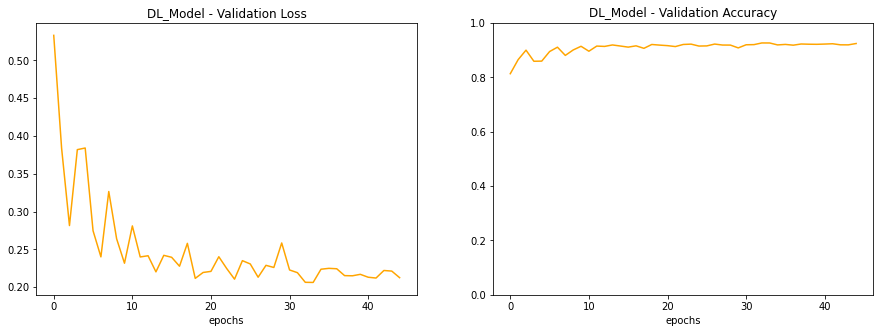

In [0]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"], color = "orange", label = 'Validation_Loss')
ax.set_title("DL_Model - Validation Loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], color = 'orange', label = 'Validation_Accuracy')
ax2.set_title("DL_Model - Validation Accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)
plt.show()

*As can be interpreted from the graph, the model generalises quite well on the validation dataset and gives an accuracy of `92.4%` with a loss of 0.21.*

### *Comparing the accuracies of Conventional ML vs Deep Learning Model using a table.*

In [0]:
table = {"Models" : ["Conventional ML model", "Deep Learning model(CNN)"], "Accuracy": [score_mlp, val_acc]}
df = pd.DataFrame(data=table)
df

,Models,Accuracy
0,Conventional ML model,0.846455
1,Deep Learning model(CNN),0.924531


*As we can see from the table, that there is a difference of around 8% in accuracies from the conventional ML model and the deep learning model. Hence, we can say that deep learning model did an overall good job in predicting the correct labels from the public dataset and outperformed the conventional ML model.*

*In the below code, we are just converting the predicted labels into an array format and printing the first 10 label predictions done by our model for public dataset.*

In [0]:
public_data_pred = DL_model.predict(images_test_public)
public_data_pred = np.argmax(public_data_pred, axis=1)
public_data_pred[0:10]

array([0, 2, 0, 0, 0, 0, 0, 0, 2, 1])

*In the below code, we are just converting the predicted labels into an array format and printing the first 10 label predictions done by our model for private dataset.*

In [0]:
private_data_pred = DL_model.predict(images_test_private)
private_data_pred = np.argmax(private_data_pred, axis=1)
private_data_pred[0:10]

array([2, 3, 2, 1, 2, 1, 1, 0, 2, 2])

# **CSV File Creation**

*Creating a csv file of ID and predicted lables for the respective images for the public data set.*

In [0]:
df = pd.DataFrame({"ID":files_test_public, "Prediction": public_data_pred})
predictions1 = df.to_csv('/content/drive/My Drive/Image_Dataset/45762643-public-deep.csv', index = False)

In [0]:
df = pd.DataFrame({"ID":files_test_private, "Prediction": private_data_pred})
predictions2 = df.to_csv('/content/drive/My Drive/Image_Dataset/45762643-private-deep.csv', index = False)

*Both of the above created files have been submitted on kaggle in class competitions with accuracies of `0.93884` and `0.62215` for the public and private set respectively.*

# <center>**Conclusion**</center>

*This task required us to build two Machine learning models namely `Conventional ML Model` and `Deep Learning Model` for predicting hair color category from the **CelebA** dataset from 4 given classes(0,1,2,3).We produced multiple conventional ML models such as Logistic regression, Decision trees, k-nearesr neighbor classifier, random forests but the model that outperformed all other models was **MLP(Multi layer perceptron**) from the conventional neural network aspect which gave an accuracy of `86%` on the validation dataset.*

*In addition to this, the best Deep learning model gave an accuracy of `92%` on the validation dataset which is an improvement of over 6% as compared to the conventional ML model.*

*The deep learning model `ranked#3` out of a total of 56 kaggle in class competition submissions on the public test set with the top performing system having an accuracy score of `0.93884%`.*

*We noticed that the Deep learning ML model generalised well on the public dataset and gave an overall accuracy score of over 93%. The public dataset was split into three main chunks of training, validation and test dataset. We had validation data to check the model performance after doing some feature engineering which resulted in a better accuracy on the public dataset, however this wasn't the same case with the private dataset as our CNN model gave an accuracy score of around `62%` on the private dataset. One possible reason could be the features of the private dataset that may not be similar to the features of the training and validation dataset from the public dataset. Other reason may be the data provided as there were certain images in the private dataset that consisted of bald men images and our model would have certainly predicted those labels incorrectly.*

*However, as a rule of thumb we know that Deep machine learning models like ANN or CNN generally perform well on the task of image recognition , image classification tasks and outperform conventional ML models which we can see in this task.*
